# Changes

This was forked from feb252018-LB-0.293 as it had a better score and i made a lot of changes to it.

Changed data processor as well.

Original LB loss was 0.293 on all train data.

Changed loss function 
from:

`0.5*bce_(F.sigmoid(input), target) - dice_coeff(F.sigmoid(input), target)` which i'm pretty sure wasn't counting the second value and was only counting half the ebc loss.

to:

`bce_(input, target) + dl(input, target)`


changed to `bce_(input, target)`

```
training epoch 10, epoch loss 0.11703551596119291
training epoch 20, epoch loss 0.08572265355005151
lowest loss: 0.07971642840476263
```

use this loss.

Add a 512 layer in the middle of the model:

```
training epoch 10, epoch loss 0.11381730951723598
training epoch 20, epoch loss 0.07700263212124507
lowest loss: 0.07065969386271068
```

Changed batchnorms (removed redundant batchnorms,i think it was just on the in_conv and in the middle of the conv block):

training epoch 10, epoch loss 0.11133377928109396
training epoch 20, epoch loss 0.07486100778693244
lowest loss: 0.06835394636506126

seems better!

change input data to RGB?
```
creating model with 7784447 params and intial param sum 1261.1062214300036
training epoch 10, epoch loss 0.13268243184401876
training epoch 20, epoch loss 0.0870554472009341
training epoch 30, epoch loss 0.07375492235379559
training epoch 40, epoch loss 0.06872930324503354
training epoch 50, epoch loss 0.06557335855350607
```

dif acticvations:
ReLU(rame as RGB above):
```
training epoch 10, epoch loss 0.13268243184401876
training epoch 20, epoch loss 0.0870554472009341
training epoch 30, epoch loss 0.07375492235379559
training epoch 40, epoch loss 0.06872930324503354
training epoch 50, epoch loss 0.06557335855350607
```

LReLU(better than relu):
```
training epoch 10, epoch loss 0.12258366672765642
training epoch 20, epoch loss 0.07909379260880607
training epoch 30, epoch loss 0.07089127662281196
training epoch 40, epoch loss 0.06314978775169168
training epoch 50, epoch loss 0.057308727964049296
```

ELU:
```
training epoch 10, epoch loss 0.13132252402248837
training epoch 20, epoch loss 0.08781700829664867
training epoch 30, epoch loss 0.07788210193670932
training epoch 40, epoch loss 0.07342443845811344
training epoch 50, epoch loss 0.06913723211203303
```

Change batchnorm to be on concatenated part of function, also in between layers and activations:

```
training epoch 10, epoch loss 0.3663586669024967
training epoch 20, epoch loss 0.25345306985435034
training epoch 30, epoch loss 0.1773699394294194
training epoch 40, epoch loss 0.13208998012400808
training epoch 50, epoch loss 0.10198846814178285
```



I didn't set my  model to .eval when using dropout so thats probably why it was a bit shit. Set model to .eval and then try dropout:

```
training epoch 10, epoch loss 0.11649728938937187
training epoch 20, epoch loss 0.08162410229089714
training epoch 30, epoch loss 0.07248632432449431
training epoch 40, epoch loss 0.06676588198613553
training epoch 50, epoch loss 0.063450128727016
```

hey its pretty goooood!

Adding the dropout and going to vaidation improved LB score to 0.316, this is the training:

```
raining epoch 5, epoch loss 0.2799394503235817
training epoch 5, epoch valid loss 0.27502278089523313
training epoch 10, epoch loss 0.1393759491804399
training epoch 10, epoch valid loss 0.15063109248876572
training epoch 15, epoch loss 0.10238741789209216
training epoch 15, epoch valid loss 0.10980822592973709
training epoch 20, epoch loss 0.08931543834899601
training epoch 20, epoch valid loss 0.12030668407678605
training epoch 25, epoch loss 0.08109052459660329
training epoch 25, epoch valid loss 0.09484595060348511
training epoch 30, epoch loss 0.07656034876249339
training epoch 30, epoch valid loss 0.09361177980899811
training epoch 35, epoch loss 0.07665667741706497
training epoch 35, epoch valid loss 0.08726294934749604
training epoch 40, epoch loss 0.07135186961999065
training epoch 40, epoch valid loss 0.08985110074281692
training epoch 45, epoch loss 0.07310031217179801
training epoch 45, epoch valid loss 0.08849393129348755
training epoch 50, epoch loss 0.06585972981625482
training epoch 50, epoch valid loss 0.09201409369707107
lowest loss: 0.0649206298158357
lowest val loss: 0.0856203556060791
```

Now turn the weights back on (the above LB was on default weight init):

```
training epoch 5, epoch loss 0.18690133408496254
training epoch 5, epoch valid loss 0.20149365961551666
training epoch 10, epoch loss 0.11434190230149972
training epoch 10, epoch valid loss 0.12861641347408295
training epoch 15, epoch loss 0.08843676843925526
training epoch 15, epoch valid loss 0.12546088844537734
training epoch 20, epoch loss 0.08016634183494668
training epoch 20, epoch valid loss 0.12093246728181839
training epoch 25, epoch loss 0.08000119452021624
training epoch 25, epoch valid loss 0.10086717009544373
training epoch 30, epoch loss 0.0728421374959381
training epoch 30, epoch valid loss 0.10699992775917053
training epoch 35, epoch loss 0.06826381826479185
training epoch 35, epoch valid loss 0.09730036109685898
training epoch 40, epoch loss 0.06520485770153372
training epoch 40, epoch valid loss 0.10080971717834472
training epoch 45, epoch loss 0.06339706196204613
training epoch 45, epoch valid loss 0.10224083662033082
training epoch 50, epoch loss 0.05960438724019026
training epoch 50, epoch valid loss 0.09619668126106262
lowest loss: 0.05960438724019026
lowest val loss: 0.08819085210561753
```

try reducing the LR:

uh unclear result...

```
lr is: 0.001
training epoch 5, epoch loss 0.2651275380661613
training epoch 5, epoch valid loss 0.2630514442920685
lr is: 0.001
training epoch 10, epoch loss 0.137310689021098
training epoch 10, epoch valid loss 0.14850359708070754
lr is: 0.001
training epoch 15, epoch loss 0.10212023732693572
training epoch 15, epoch valid loss 0.11160236150026322
lr is: 0.001
training epoch 20, epoch loss 0.09024559059425404
training epoch 20, epoch valid loss 0.10281988233327866
lr is: 0.001
training epoch 25, epoch loss 0.08365249957301114
training epoch 25, epoch valid loss 0.09156313389539719
lr is: 0.001
training epoch 30, epoch loss 0.0776709483838395
training epoch 30, epoch valid loss 0.08798167109489441
lr is: 0.001
training epoch 35, epoch loss 0.073980111236635
training epoch 35, epoch valid loss 0.08811588734388351
lr is: 0.001
training epoch 40, epoch loss 0.07226760861904998
training epoch 40, epoch valid loss 0.08435594141483307
lr is: 0.001
training epoch 45, epoch loss 0.06857930476728238
training epoch 45, epoch valid loss 0.08406678885221482
lr is: 0.001
training epoch 50, epoch loss 0.06602476390176698
training epoch 50, epoch valid loss 0.08886651545763016

lowest loss: 0.06602476390176698
lowest val loss: 0.08406678885221482
``` 
also unclear irf the LR is actually decreasing.

try a random shuffle:

```
training epoch 5, epoch loss 0.3265280864740673
training epoch 5, epoch valid loss 0.31111426949501036
training epoch 10, epoch loss 0.16066503720848183
training epoch 10, epoch valid loss 0.18539445698261262
training epoch 15, epoch loss 0.10865447846682448
training epoch 15, epoch valid loss 0.12749626040458678
training epoch 20, epoch loss 0.09456822903532731
training epoch 20, epoch valid loss 0.14059550017118455
training epoch 25, epoch loss 0.09018122542061303
training epoch 25, epoch valid loss 0.09573075771331788
training epoch 30, epoch loss 0.08329122033166259
training epoch 30, epoch valid loss 0.09050771147012711
training epoch 35, epoch loss 0.0802257931546161
training epoch 35, epoch valid loss 0.08112097531557083
training epoch 40, epoch loss 0.08775402478089459
training epoch 40, epoch valid loss 0.08581297397613526
training epoch 45, epoch loss 0.07781059628254489
training epoch 45, epoch valid loss 0.0818173572421074
training epoch 50, epoch loss 0.07585528541944529
training epoch 50, epoch valid loss 0.10251846015453339
lowest loss: 0.07455404887073919
lowest val loss: 0.07805211693048478
```

BUT LB score on test set was 0.118. PRetty bad.



try clipping gradients to reduce the size of weight updates after epoch 30:

Changed to 2x2 convs, with 2 stride?

Scale input to be between 0 - 1?


# Setup

In [1]:
import os
import glob
from utils import *

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau, StepLR
from torch.utils import data

from torch.autograd import Variable, Function

from torchvision.datasets import ImageFolder
from torchvision import transforms, datasets

from PIL import Image, ImageFilter
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

# Constants

In [2]:
BATCH_SIZE = 16
DATA_PATH= '/home/yvan/projects/data_sci_bowl_2018/data'
N_EPOCHS = 50
FILTER_DEPTH_IN, FILTER_DEPTH_OUT = 3, 1
IMG_SIZE = 512
LR = 0.001

# Re-creating datasets

In [3]:
# # create a train, test, validation datasets
# convert_raw_train(folder_name='stage1_train', 
#                   make_valid=True,
#                   rand_state=75)
# convert_raw_test(folder_name='stage1_test', folder_new='test_img')
dir_contents = [os.listdir(os.path.join(DATA_PATH, 'train_img', 'all')), os.listdir(os.path.join(DATA_PATH, 'valid_img', 'all'))]
list(map(len, dir_contents))

[603, 67]

# Data Processing

In [4]:
#create a custom imageloader that gets the name of the file as well
class YvanImageFolder(ImageFolder):
    def __getitem__(self,index):
        return super(YvanImageFolder, self).__getitem__(index), self.imgs[index]
    
class YvanDataset(data.Dataset):
    '''
    dataset wrapping image folders can't use default because 
    we need to load and transform target masks for segmentation!
    '''
    def __init__(self, img_path, target_path, transform=None, transform_target=None):
        self.imgs = sorted(glob.glob(os.path.join(img_path, '**/*.jpg')))
        self.targets = sorted(glob.glob(os.path.join(target_path, '**/*.jpg')))
        self.transform = transform
        self.transform_target = transform_target
        
    def __getitem__(self, index):
        img = Image.open(self.imgs[index])
        target = Image.open(self.targets[index])
        
        seed = np.random.randint(2147483647) # make a seed with numpy generator 
        np.random.seed(seed) 
        if self.transform:
            img = self.transform(img)
        np.random.seed(seed) 
        if self.transform_target:
            target = self.transform_target(target)
            
        return img, target, self.imgs[index], self.targets[index]
    
    def __len__(self):
        return len(self.imgs)
        
# train data
img_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE,IMG_SIZE)),
    transforms.ToTensor(),
])

target_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE,IMG_SIZE)),
    transforms.Grayscale(),
    transforms.ToTensor()
])

img_dataset = YvanDataset(os.path.join(DATA_PATH, 'train_img'),
                              os.path.join(DATA_PATH,'train_mask'),
                              transform=img_transform,
                              transform_target=target_transform)

img_loader = data.DataLoader(dataset=img_dataset,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             num_workers=1)

for (img, mask, name, target_name) in img_loader:
    a,b,name,target_name = img[3], mask[3], name[3], target_name[3]
    print(name, target_name)
    print(type(a),type(b))
    print(a.size(), b.size())
    print(torch.max(a[0]), torch.min(a[0]), torch.max(b[0]), torch.min(b[0]))
    timg = transforms.ToPILImage()(a.cpu())
    tmask = transforms.ToPILImage()(b.cpu())
    break

/home/yvan/projects/data_sci_bowl_2018/data/train_img/all/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_img.jpg /home/yvan/projects/data_sci_bowl_2018/data/train_mask/all/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_mask.jpg
<class 'torch.FloatTensor'> <class 'torch.FloatTensor'>
torch.Size([3, 512, 512]) torch.Size([1, 512, 512])
0.5607843399047852 0.003921568859368563 1.0 0.0


In [5]:
valid_dataset = YvanDataset(os.path.join(DATA_PATH, 'valid_img'),
                              os.path.join(DATA_PATH,'valid_mask'),
                              transform=img_transform,
                              transform_target=target_transform)
valid_loader = data.DataLoader(dataset=valid_dataset,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             num_workers=1)

for (img, mask, name, target_name) in valid_loader:
    a,b,name,target_name = img[3], mask[3], name[3], target_name[3]
    print(name, target_name)
    print(type(a),type(b))
    print(a.size(), b.size())
    print(torch.max(a[0]), torch.min(a[0]), torch.max(b[0]), torch.min(b[0]))
    timg = transforms.ToPILImage()(a.cpu())
    tmask = transforms.ToPILImage()(b.cpu())
    break

/home/yvan/projects/data_sci_bowl_2018/data/valid_img/all/07fb37aafa6626608af90c1e18f6a743f29b6b233d2e427dcd1102df6a916cf5_img.jpg /home/yvan/projects/data_sci_bowl_2018/data/valid_mask/all/07fb37aafa6626608af90c1e18f6a743f29b6b233d2e427dcd1102df6a916cf5_mask.jpg
<class 'torch.FloatTensor'> <class 'torch.FloatTensor'>
torch.Size([3, 512, 512]) torch.Size([1, 512, 512])
0.9372549057006836 0.05882352963089943 1.0 0.0


Ok so we can convert our stuff into tensors and convert them back into images.

# Unet model

referenced: https://github.com/milesial/Pytorch-UNet/blob/master/unet/unet_parts.py

In [6]:
### conv building block ###

class conv_block(nn.Module):
    def __init__(self, in_chan, out_chan):
        super(conv_block, self).__init__()
        self.conv = nn.Sequential(
            nn.BatchNorm2d(in_chan),
            nn.Conv2d(in_chan, out_chan, 3, padding=1),
            nn.LeakyReLU(),
            nn.Conv2d(out_chan, out_chan, 3, padding=1),
            nn.LeakyReLU()
        )
        
    def forward(self, x):
        x = self.conv(x)
        return x

class conv_block_drop(nn.Module):
    def __init__(self, in_chan, out_chan, drop):
        super(conv_block_drop, self).__init__()
        self.conv = nn.Sequential(
            nn.BatchNorm2d(in_chan),
            nn.Conv2d(in_chan, out_chan, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Dropout(p=drop),
            nn.Conv2d(out_chan, out_chan, 3, padding=1),
            nn.ReLU(inplace=True)
        )
        
    def forward(self, x):
        x = self.conv(x)
        return x
    
### inputs and outputs ###

class in_conv(nn.Module):
    def __init__(self, in_chan, out_chan):
        super(in_conv, self).__init__()
        self.conv = conv_block(in_chan, out_chan)
        
    def forward(self, x):
        return self.conv(x)
        
class out_conv(nn.Module):
    def __init__(self, in_chan, out_chan):
        super(out_conv, self).__init__()
        self.bn = nn.BatchNorm2d(in_chan)
        self.conv = nn.Conv2d(in_chan, out_chan, 1)
        self.activation = nn.Sigmoid()
        
    def forward(self, x):
        return self.activation(self.conv(self.bn(x)))
    
### actual conv blocks ###

class conv_down(nn.Module):
    def __init__(self, in_chan, out_chan, drop):
        super(conv_down, self).__init__()
        self.conv = conv_block_drop(in_chan, out_chan, drop)
        self.pool = nn.MaxPool2d(2)
        
    def forward(self, x):
        x = self.pool(self.conv(x))
        return x

class conv_up(nn.Module):
    def __init__(self, in_chan, out_chan):
        super(conv_up, self).__init__()
        self.conv_up = nn.ConvTranspose2d(in_chan, out_chan, 2, stride=2)
        self.conv = conv_block(2*out_chan, out_chan)
        self.bn = nn.BatchNorm2d(in_chan)
    
    def forward(self, x1, x2):
        x1 = self.bn(x1)
        x1 = self.conv_up(x1)
        x = torch.cat([x2,x1],dim=1)
        x = self.conv(x)
        return x
    
class conv_up_drop(nn.Module):
    def __init__(self, in_chan, out_chan, drop):
        super(conv_up_drop, self).__init__()
        self.conv_up = nn.ConvTranspose2d(in_chan, out_chan, 2, stride=2)
        self.conv = conv_block_drop(2*out_chan, out_chan, drop)
        self.bn = nn.BatchNorm2d(in_chan)
    
    def forward(self, x1, x2):
        x1 = self.bn(x1)
        x1 = self.conv_up(x1)
        x = torch.cat([x2,x1],dim=1)
        x = self.conv(x)
        return x
    
class unet1(nn.Module):
    def __init__(self, in_chan, out_chan):
        super(unet1, self).__init__()
        self.inc = in_conv(in_chan, 8)
        self.down0 = conv_down(8, 16, 0.1)
        self.down1 = conv_down(16, 32, 0.1)
        self.down2 = conv_down(32, 64, 0.1)
        self.down3 = conv_down(64, 128, 0.1)
        self.down4 = conv_down(128, 256, 0.2)
        self.down5 = conv_down(256, 512, 0.2)
        self.up1 = conv_up_drop(512, 256, 0.2)
        self.up2 = conv_up_drop(256, 128, 0.2)
        self.up3 = conv_up_drop(128, 64, 0.1)
        self.up4 = conv_up_drop(64, 32, 0.1)
        self.up5 = conv_up_drop(32, 16, 0.1)
        self.up6 = conv_up_drop(16, 8, 0.1)
        self.out = out_conv(8, out_chan)
        
    def forward(self, x):
        xn = self.inc(x)
        x0 = self.down0(xn)
        x1 = self.down1(x0)
        x2 = self.down2(x1)
        x3 = self.down3(x2)
        x4 = self.down4(x3)
        x = self.up2(x4, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        x = self.up5(x, x0)
        x = self.up6(x, xn)
        x = self.out(x)
        return x

In [7]:
# create a unet
unet = unet1(FILTER_DEPTH_IN, FILTER_DEPTH_OUT)
opti = optim.Adam(unet.parameters(), lr=LR, betas=(0.5,0.99))
# sched = ReduceLROnPlateau(opti, mode='min', threshold=0.001, patience=5)
loss = BCEDiceLoss()

nparams = sum([param.nelement() for param in unet.parameters()])
psum = check_param_sum(unet)
print(f'creating model with {nparams} params and intial param sum {psum}')

if torch.cuda.is_available():
    unet.cuda()
    loss.cuda()

creating model with 7784447 params and intial param sum 1287.5590491164476


In [8]:
losses = []
valid_losses = []

for epoch in range(N_EPOCHS):
    epoch_loss = []
    e = epoch+1
    for (batch, mask_batch, _, _) in img_loader:
        image_batch = to_variable(batch)
        labels = to_variable(mask_batch)
        x = unet(image_batch)
        l = loss(x, labels)
        epoch_loss.append(l.data[0])
        unet.zero_grad()
        l.backward()
        opti.step()
        
    mean_epoch_loss = np.mean(epoch_loss)
    losses.append(mean_epoch_loss)

    valid_loss = []
    for (batch, mask_batch, _, _) in valid_loader:
        image_batch = to_variable(batch)
        labels = to_variable(mask_batch)
        freeze_model(unet)
        x = unet(image_batch)
        
        vl = loss(x, labels)
        unfreeze_model(unet)
        valid_loss.append(vl.data[0])
        
    mean_valid_loss = np.mean(valid_loss)
    valid_losses.append(mean_valid_loss)
    
    if not e % 5: 
        lr_t = opti.param_groups[0]['lr']
        print(f'lr is: {lr_t}')
        print(f'training epoch {e}, epoch loss {mean_epoch_loss}')
        print(f'training epoch {e}, epoch valid loss {mean_valid_loss}')
    epoch_loss = []
    valid_loss = []

lr is: 0.001
training epoch 5, epoch loss 0.3265280864740673
training epoch 5, epoch valid loss 0.31111426949501036
lr is: 0.001
training epoch 10, epoch loss 0.16066503720848183
training epoch 10, epoch valid loss 0.18539445698261262
lr is: 0.001
training epoch 15, epoch loss 0.10865447846682448
training epoch 15, epoch valid loss 0.12749626040458678
lr is: 0.001
training epoch 20, epoch loss 0.09456822903532731
training epoch 20, epoch valid loss 0.14059550017118455
lr is: 0.001
training epoch 25, epoch loss 0.09018122542061303
training epoch 25, epoch valid loss 0.09573075771331788
lr is: 0.001
training epoch 30, epoch loss 0.08329122033166259
training epoch 30, epoch valid loss 0.09050771147012711
lr is: 0.001
training epoch 35, epoch loss 0.0802257931546161
training epoch 35, epoch valid loss 0.08112097531557083
lr is: 0.001
training epoch 40, epoch loss 0.08775402478089459
training epoch 40, epoch valid loss 0.08581297397613526
lr is: 0.001
training epoch 45, epoch loss 0.0778105

lowest loss: 0.07455404887073919
lowest val loss: 0.07805211693048478


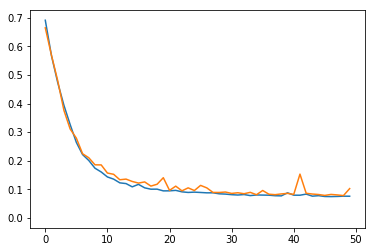

In [9]:
lowestloss = min(losses)
lowestvalid = min(valid_losses)
print(f'lowest loss: {lowestloss}')
print(f'lowest val loss: {lowestvalid}')
plt.plot(losses)
plt.plot(valid_losses)
plt.plot(np.linspace(0,25,1))
plt.show()

In [10]:
# model_file = 'models/model_feb252018_5:02.pkl'
# torch.save(unet, model_file)
# unet = torch.load(model_file)

# Examining Predictions

In [11]:
freeze_model(unet)
predicted_masks = []
actual_masks = []
names = []
unet.eval()
for (batch, mask_batch, batch_name, mask_name) in img_loader:
    image_batch = to_variable(batch)
    labels = to_variable(mask_batch)
    names.extend(batch_name)
    x = unet(image_batch)
    for i, l in zip(x.data, labels.data):
        predicted_masks.append(transforms.ToPILImage(mode='L')(i.cpu()))
        actual_masks.append(transforms.ToPILImage(mode='L')(l.cpu()))
        
assert len(predicted_masks) == len(actual_masks)
assert len(predicted_masks) == len(names)

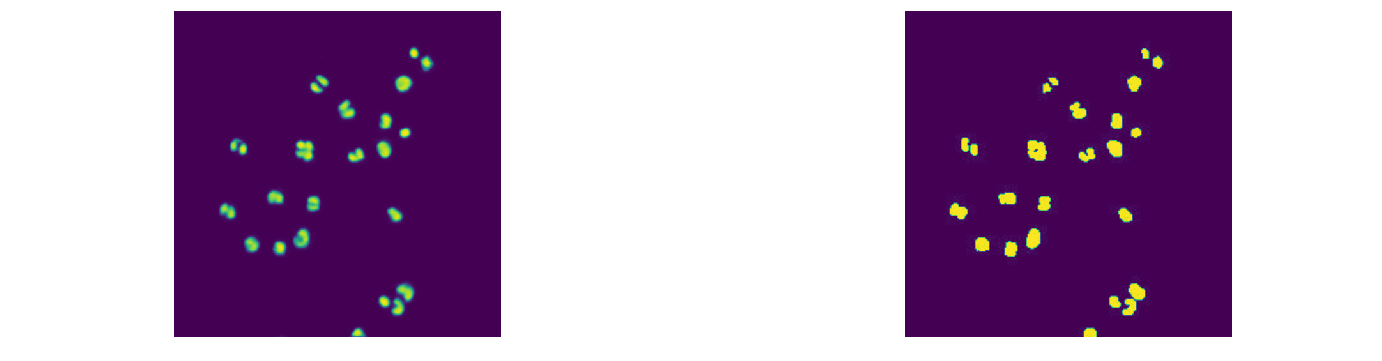

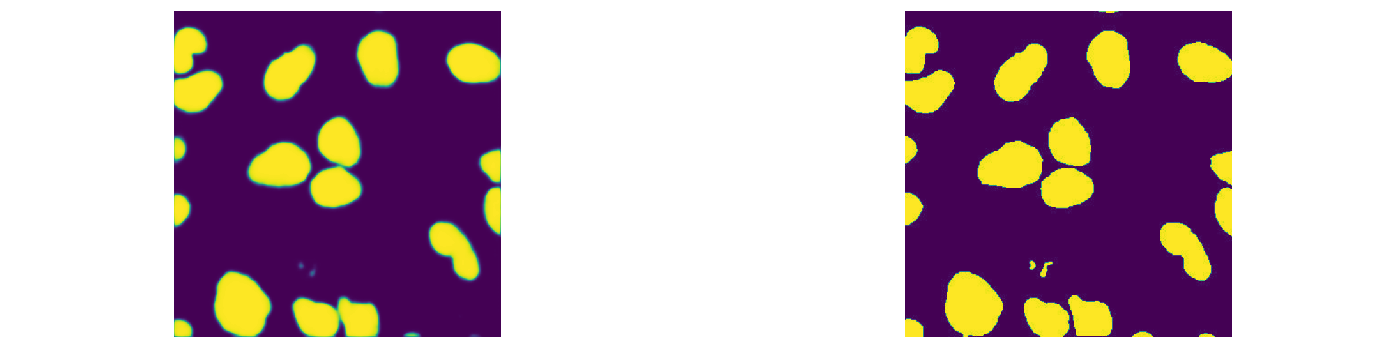

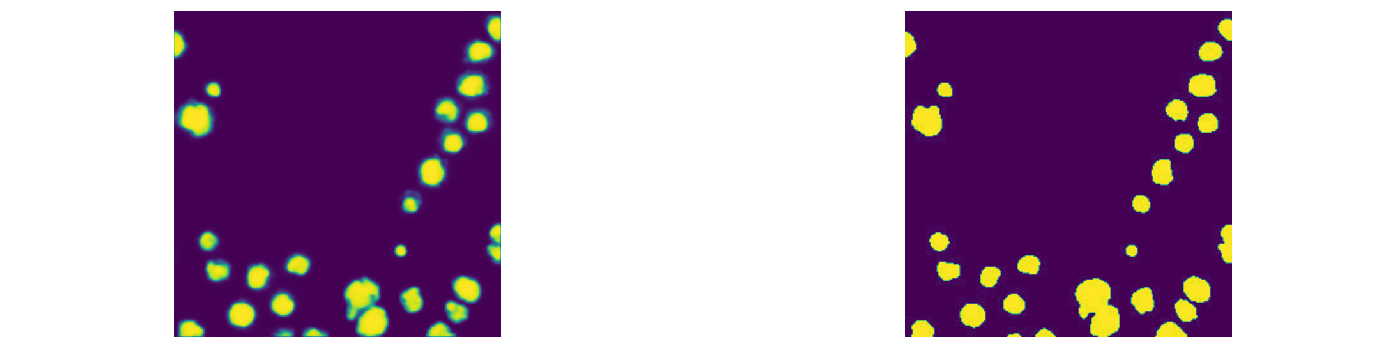

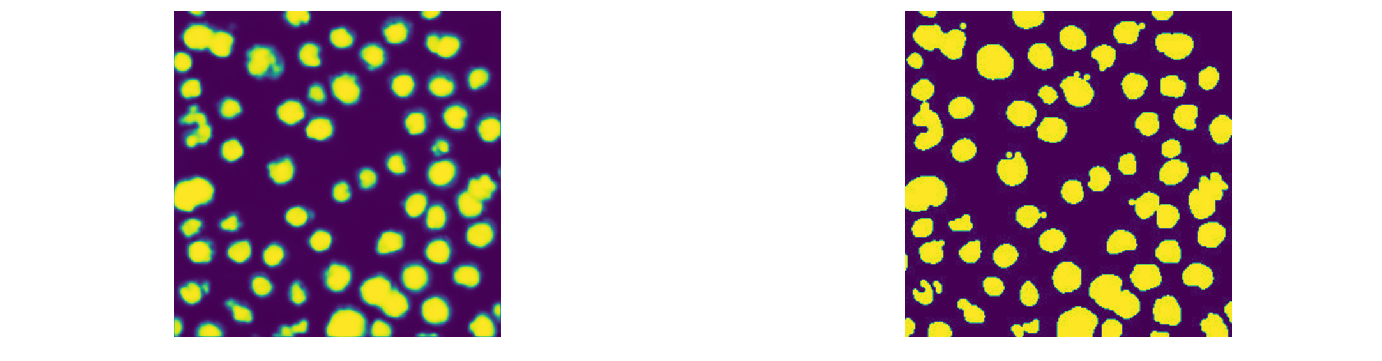

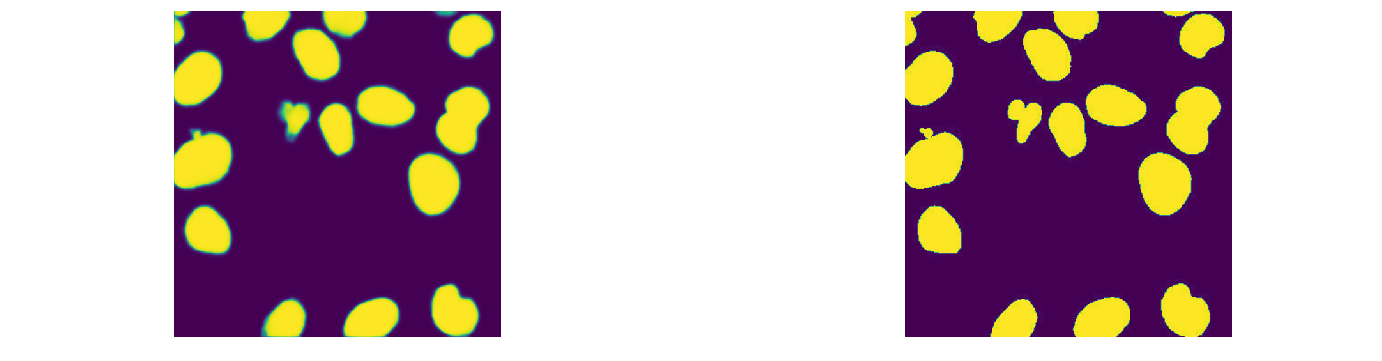

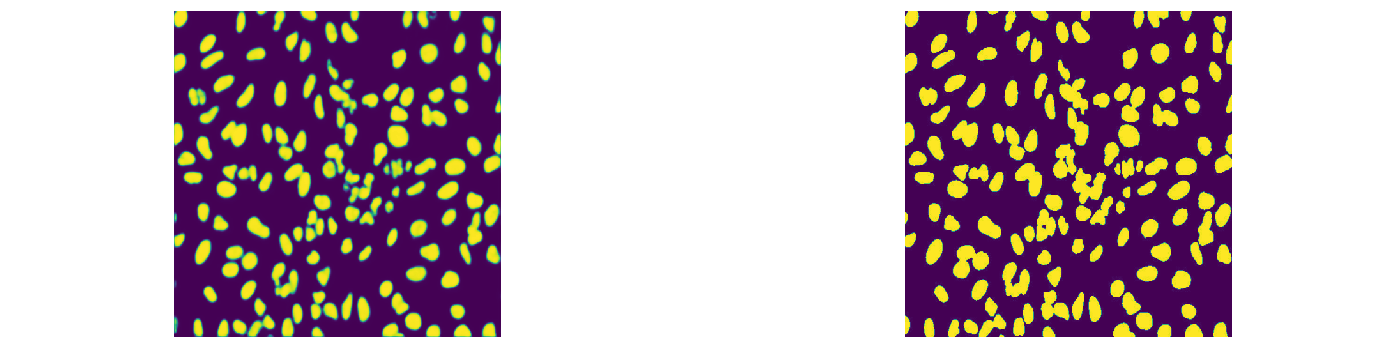

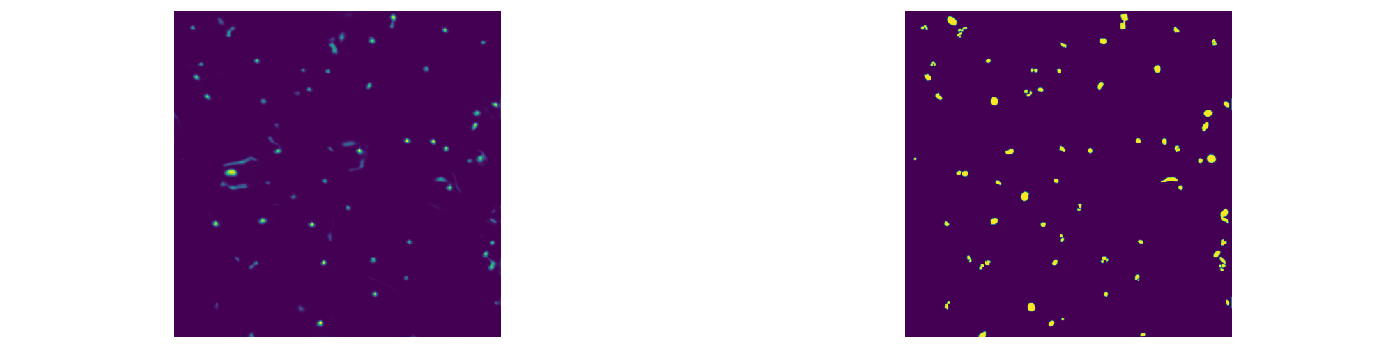

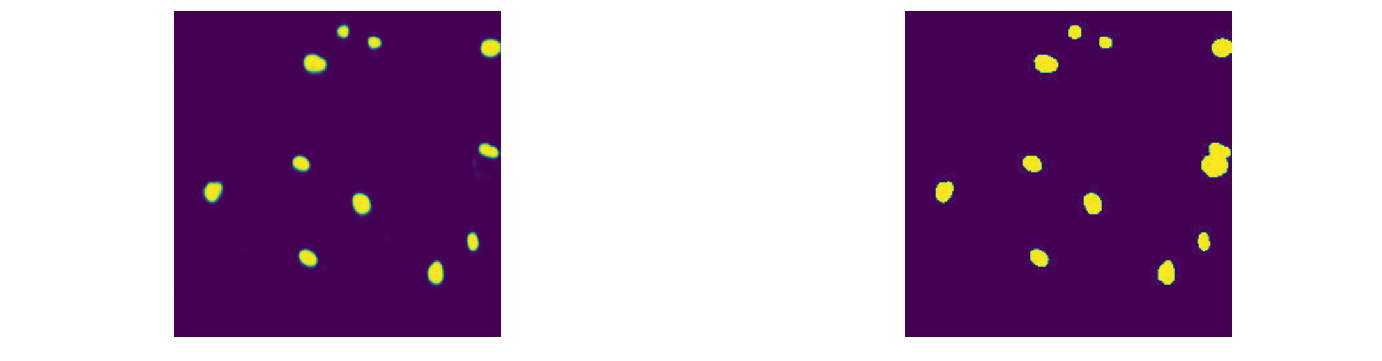

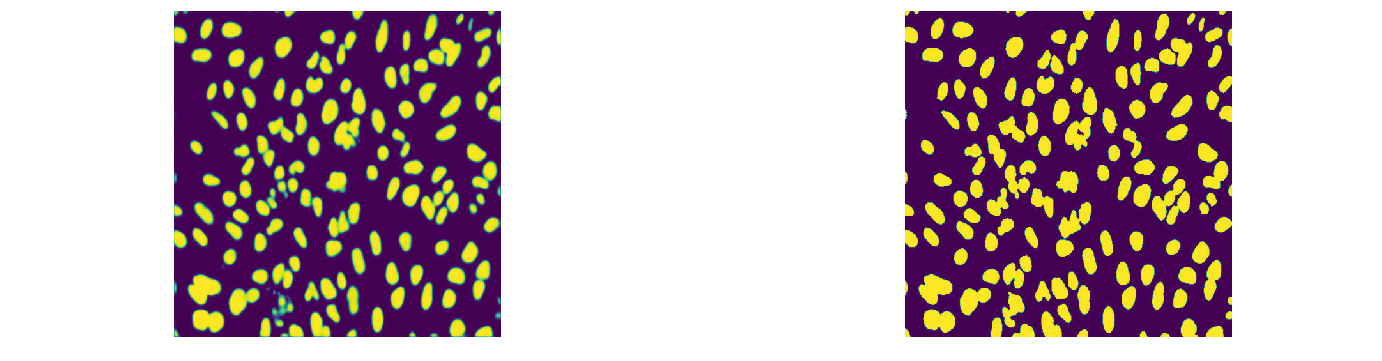

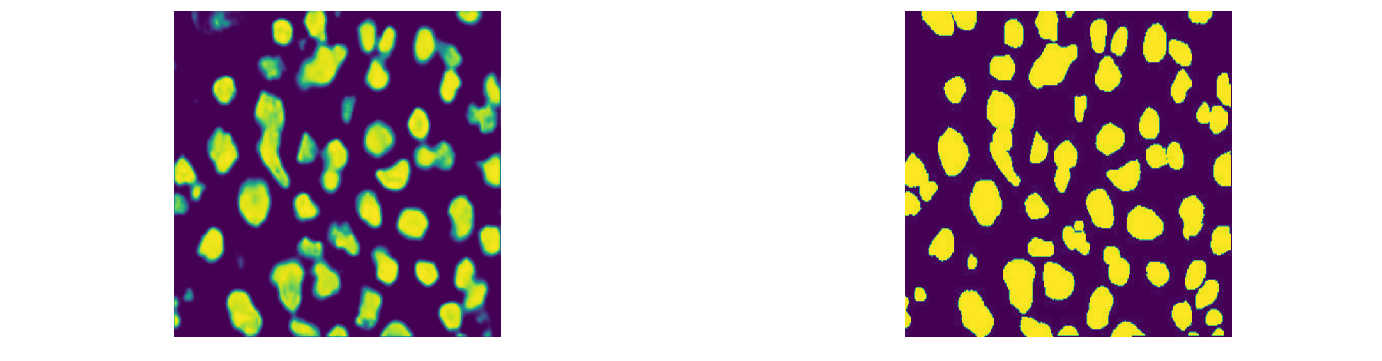

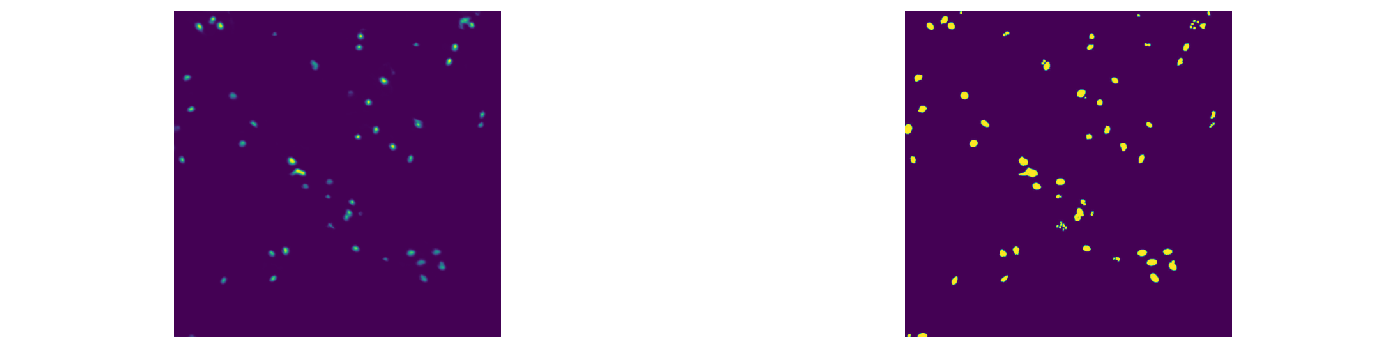

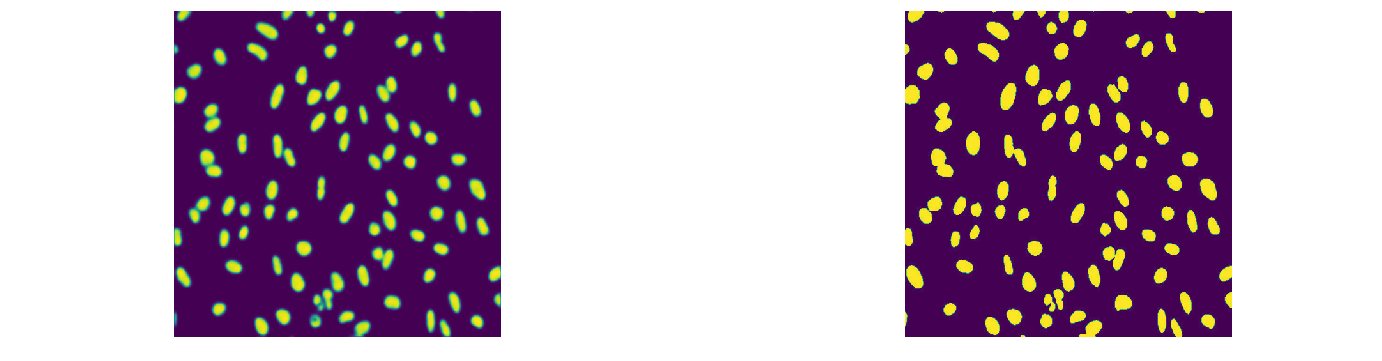

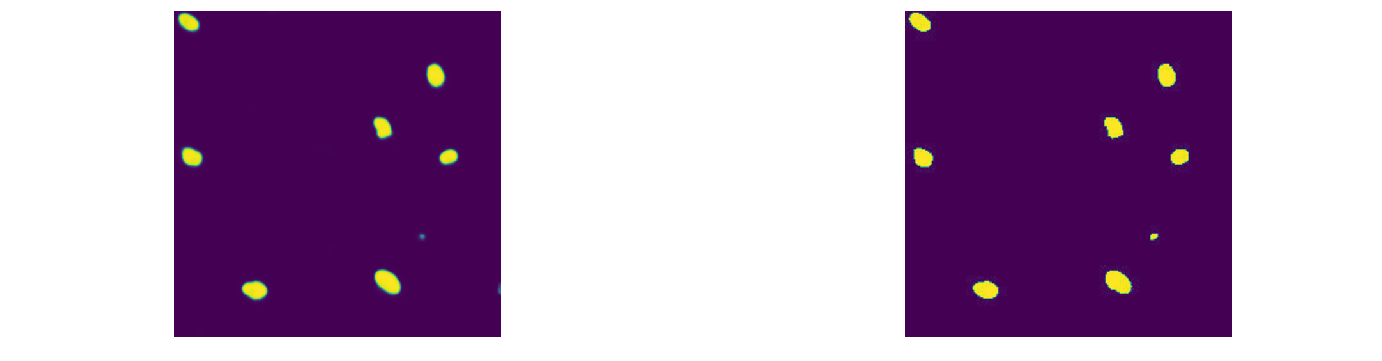

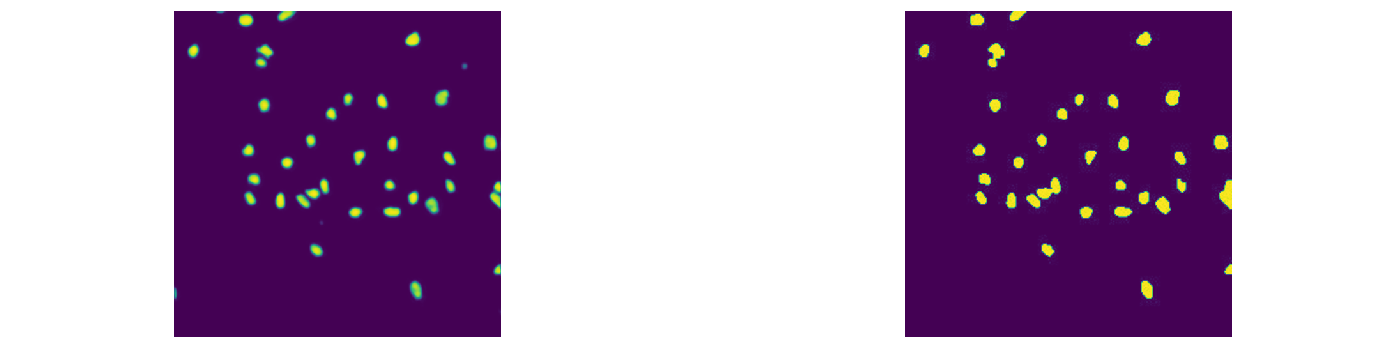

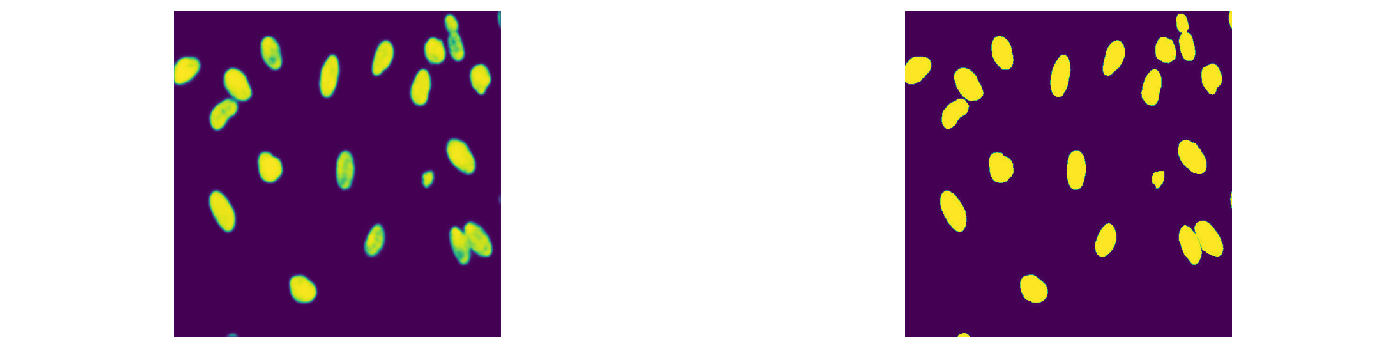

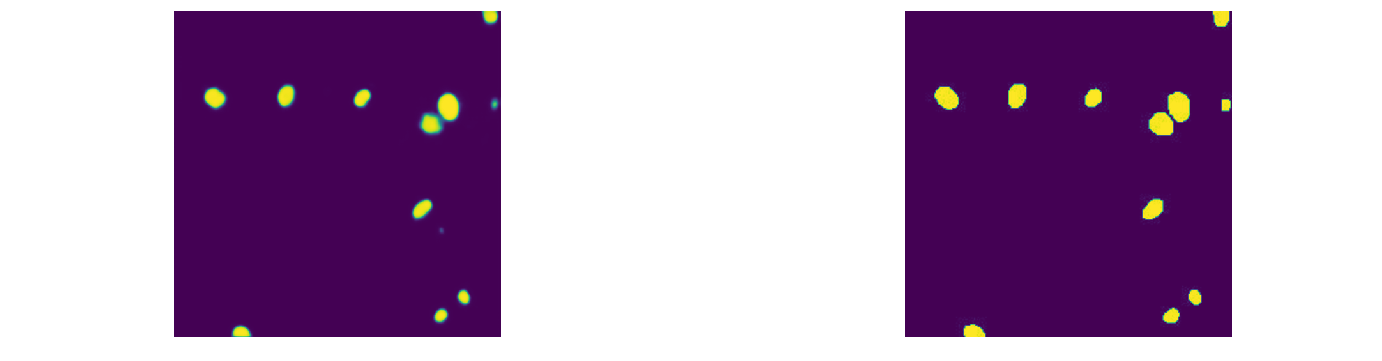

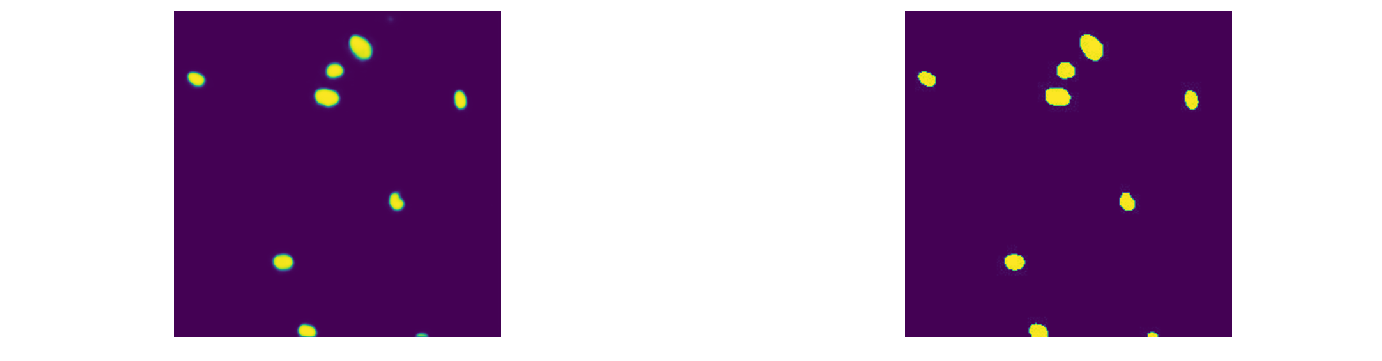

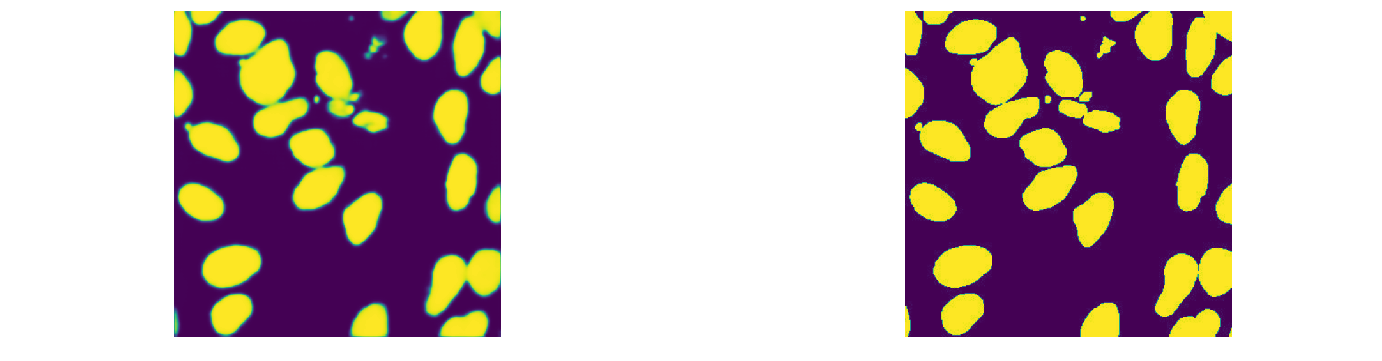

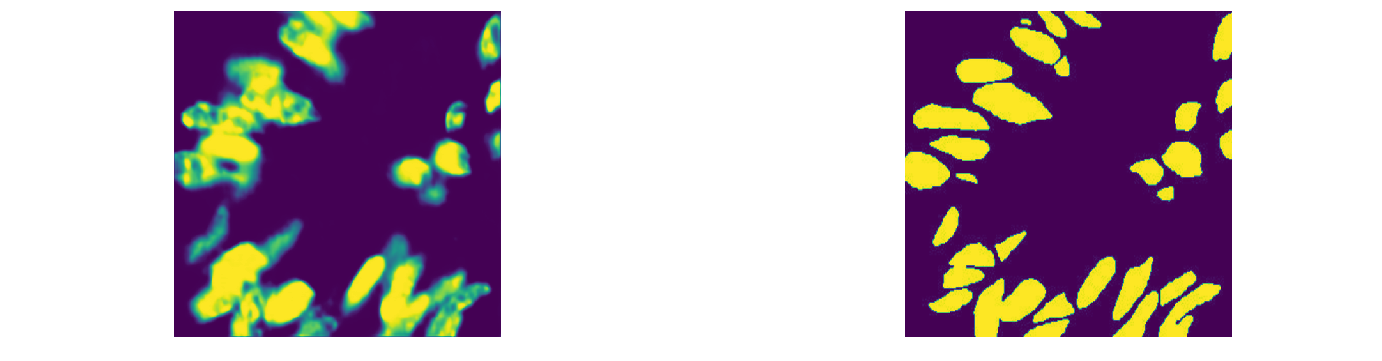

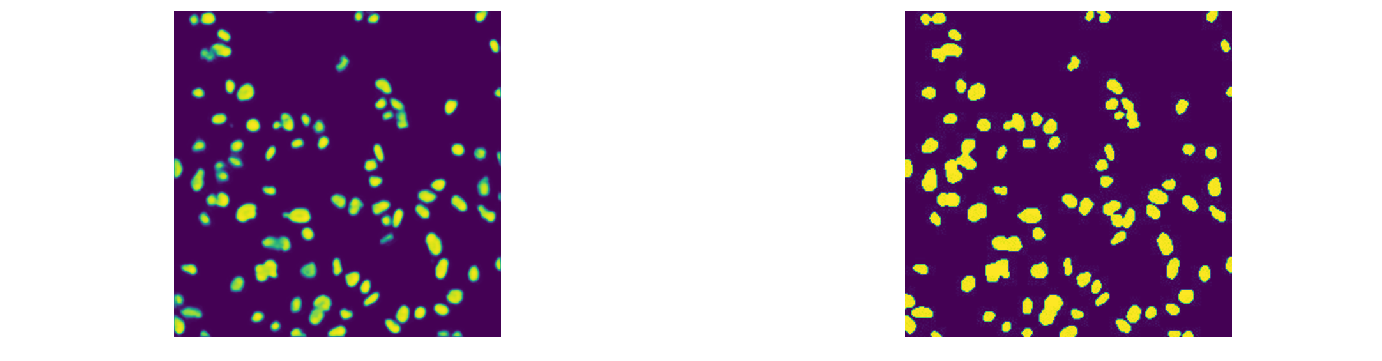

In [12]:
def show_n(img_files, n=6):
    _, ax = plt.subplots(1, n, sharex='col', sharey='row', figsize=(24,6))
    
    for i, img_file in enumerate(img_files):
        ax[i].imshow(img_file)
        ax[i].axis('off')
        
for pred,actual in zip(predicted_masks[20:40], actual_masks[20:40]):
    show_n([np.asarray(pred), np.asarray(actual)],n=2)

In [15]:
assert pred.mode == actual.mode

# Generating test predictions

In [16]:
BATCH_SIZE_INF = 8

test_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE,IMG_SIZE)),
#     transforms.Grayscale(),
    transforms.ToTensor()
])


test_transform_size = transforms.Compose([
    transforms.ToTensor()
])

test_dataset = YvanImageFolder(os.path.join(DATA_PATH, 'test_img'), test_transform)
test_loader = data.DataLoader(dataset=test_dataset,
                             batch_size=BATCH_SIZE_INF,
                             shuffle=False,
                             num_workers=1)


test_sizes = YvanImageFolder(os.path.join(DATA_PATH, 'test_img'), test_transform_size)
test_sizes_loader = data.DataLoader(dataset=test_sizes,
                             batch_size=1,
                             shuffle=False,
                             num_workers=1)

In [17]:
sizes_in_order = [tuple(batch[0].size()[2:]) for batch, paths in test_sizes_loader]

In [18]:
predicted_names = []
predicted_test = []
ct = 0

for batch, paths in test_loader:
    predicted_names += list(paths[0])
    image_batch = to_variable(batch[0])
    x = unet(image_batch)
    for i in x.data:
        size = sizes_in_order[ct]
        im = transforms.ToPILImage()(i.cpu())
        im = im.resize((size[1], size[0]), resample=Image.NEAREST)
        predicted_test.append(im)
        ct += 1

In [19]:
for i in range(len(sizes_in_order)): 
    assert sizes_in_order[i] == np.asarray(predicted_test[i]).shape

# Make a submission

In [20]:
%reload_ext autoreload
from utils import *
from skimage.morphology import label

def prob_to_rles(x, cutoff=0.5):
    lab_img = label(x > cutoff)
    for i in range(1, lab_img.max() + 1):
        yield rle_encode(lab_img == i)
        
# https://www.kaggle.com/paulorzp/run-length-encode-and-decode
def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    # if you dont transpose it scores 0!
    # this is bceause its top to bottomr first
    # then left to right so you gotta trnaspose.
    pixels = img.T.flatten()
    pixels[0] = 0
    pixels[-1] = 0
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 2
    runs[1::2] = runs[1::2] - runs[:-1:2]
    return ' '.join(str(x) for x in runs)
 
def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

In [21]:
import pandas as pd

test_names = []
test_rles = [] 
for i, (p, path) in enumerate(zip(predicted_test, predicted_names)):
    supposed_size = sizes_in_order[i]
    pred_slide = np.asarray(np.array(p)/255)
    name = os.path.splitext(os.path.basename(path))[0].split('_')[0]
    rles = list(prob_to_rles(pred_slide, cutoff=0.75))
    test_rles.extend(rles)
    test_names.extend([name]*len(rles))

In [22]:
sub = pd.DataFrame()
sub['ImageId'] = test_names
sub['EncodedPixels'] = pd.Series(test_rles)
# sub['EncodedPixels'] = pd.Series(test_rles).apply(lambda x: ' '.join(str(y) for y in x))
sub.tail(n=15)

,ImageId,EncodedPixels
2907,fe9adb627a6f45747c5a8223b671774791ededf9364f65...,25536 1 25790 5 26046 6 26303 4 26558 4 26815 2
2908,fe9adb627a6f45747c5a8223b671774791ededf9364f65...,9923 3 10178 5 10433 6 10689 6 10946 4
2909,fe9adb627a6f45747c5a8223b671774791ededf9364f65...,19655 5 19911 6 20167 5 20424 4 20681 2
2910,fe9adb627a6f45747c5a8223b671774791ededf9364f65...,27847 6 28103 7 28359 7 28616 5 28873 3
2911,fe9adb627a6f45747c5a8223b671774791ededf9364f65...,30672 5 30927 8 31182 10 31438 11 31694 11 319...
2912,fe9adb627a6f45747c5a8223b671774791ededf9364f65...,16602 1 16857 2 17111 6 17368 5 17625 2
2913,fe9adb627a6f45747c5a8223b671774791ededf9364f65...,27098 4 27352 8 27607 9 27863 10 28119 10 2837...
2914,fe9adb627a6f45747c5a8223b671774791ededf9364f65...,41692 4 41947 7 42202 9 42458 10 42714 10 4297...
2915,fe9adb627a6f45747c5a8223b671774791ededf9364f65...,20966 3 21221 6 21477 7 21733 9 21989 9 22245 ...
2916,fe9adb627a6f45747c5a8223b671774791ededf9364f65...,7932 2 8186 5 8439 8 8690 13 8945 12 9200 10 9...


In [23]:
idt = 'fe9adb627a6f45747c5a8223b671774791ededf9364f6544be487c540107fa4f'
sub[sub['ImageId'] == idt].shape

(87, 2)

In [24]:
sub.to_csv(os.path.join(DATA_PATH, 'submissions','march52018_5.csv'), index=False)

march32018_3 - LB 0.291

march52018_1 - LB 0.316 w/ validation data

Really graet run through:

https://www.kaggle.com/raoulma/nuclei-dsb-2018-tensorflow-u-net-score-0-352